In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as sp

%config InlineBackend.figure_format = 'retina' 

-- Simulations:
---- Argument for Different population dist (normal, uniform, binomial)
---- Argument for sample size (less than 30 and beyond 30)

In [2]:
#Std normal distribution
def norm_pdf(x, mue, var):
    return sp.norm.pdf(x,mue,var)

def norm_cdf(x, mue, var):
    return sp.norm.cdf(x,mue,var)

def norm_inv_cdf(x, mue, var):
    return sp.norm.ppf(x,mue,var)

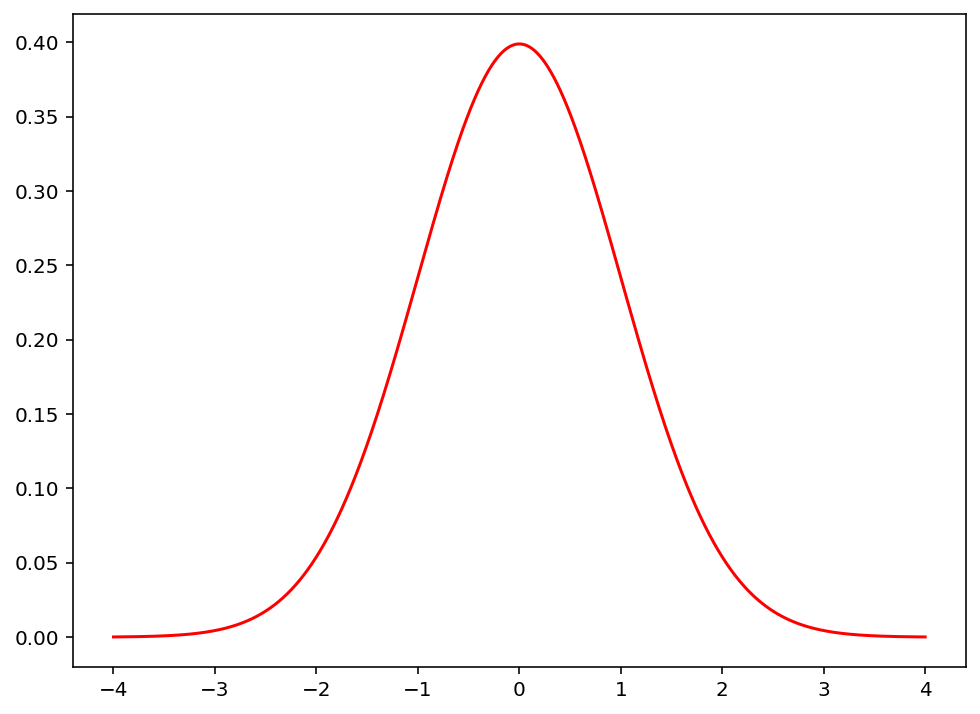

In [3]:
x_values = np.linspace(-4,4,10000)

fig, ax = plt.subplots(figsize=(8,6)) 
ax.plot(x_values,  norm_pdf(x_values, 0, 1), color = 'red')
plt.show()


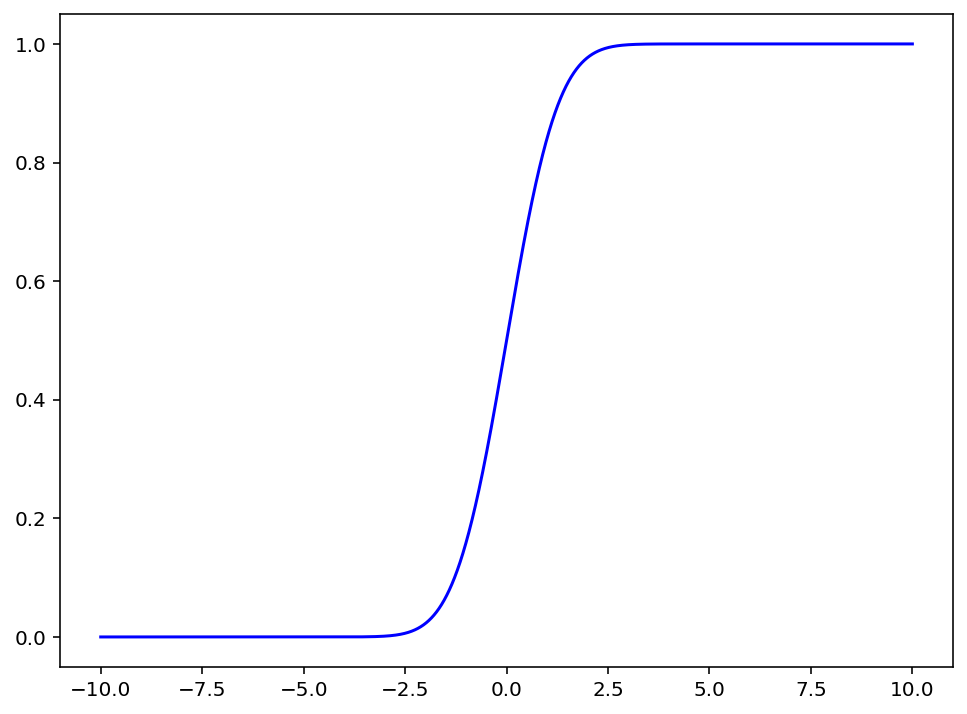

In [4]:
x_values = np.linspace(-10,10,10000)

fig, ax = plt.subplots(figsize=(8,6)) 
ax.plot(x_values,  norm_cdf(x_values, 0, 1), color = 'blue')
plt.show()


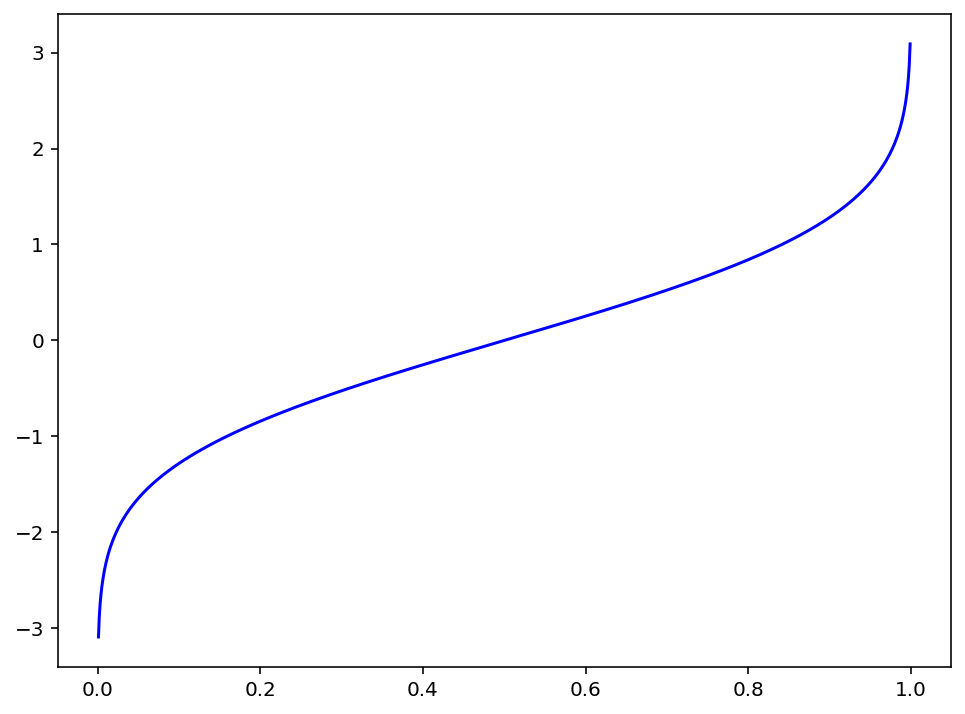

In [5]:
x_values = np.linspace(0,1,1000)

fig, ax = plt.subplots(figsize=(8,6)) 
ax.plot(x_values,  norm_inv_cdf(x_values, 0, 1), color = 'blue')
plt.show()


In [6]:
print(norm_cdf(1.96, 0, 1))
print(norm_cdf(-1.96, 0, 1))

print(norm_cdf(1.96, 0, 1)-norm_cdf(-1.96, 0, 1))

0.9750021048517795
0.024997895148220435
0.950004209703559


In [7]:
print(1-norm_cdf(-0.2467, 0, 1))

0.597429796718102


The percent point function (ppf) is the inverse of the cumulative distribution function. 

In [7]:
# For 95% confidence interval
# significance level of .05

print(norm_inv_cdf(0.05/2, 0, 1))
print(norm_inv_cdf(1-0.05/2, 0, 1))

-1.9599639845400545
1.959963984540054


In [8]:
print(norm_inv_cdf(0.10/2, 0, 1))

-1.6448536269514729


In [9]:
(16-16.43)/(0.8/np.sqrt(15))

-2.081728548586485

In [10]:
print(norm_cdf(-2.0817, 0, 1))

0.018684940320456957


#### pvalue from z score

In [11]:
# p value from Z score. Left tailed test

print(sp.norm.sf(abs(-2.0817))) # left tailed test. Zscore should be negative
print(norm_cdf(-2.0817, 0, 1)) # left tailed test's p value is equal to the area to the left of z score

0.018684940320456957
0.018684940320456957


In [12]:
# p value from Z score. right tailed test

print(sp.norm.sf(abs(2.67))) # right tailed test
print(1-norm_cdf(2.67, 0, 1)) # right tailed test's p value is equal to the area to the right of z score

0.0037925623476854887
0.0037925623476854353


In [13]:
# p value from Z score. two tailed test

print(sp.norm.sf(abs(1.7))*2) # two tailed test
print( 1- (norm_cdf(1.7, 0, 1) - norm_cdf(-1.7, 0, 1)) )
# two tailed test's p value is equal to the area to the right of z score and left of -zscore

0.08913092551708608
0.08913092551708601


In [3]:
print(min(sp.norm.sf(abs(0.241)),sp.norm.cdf(abs(0.241)))*2) # two tailed test
print(min(sp.norm.sf(abs(0.241)),sp.norm.cdf(abs(0.241)))) # right tailed test

0.8095551165238863
0.40477755826194317


### further trails on distributions

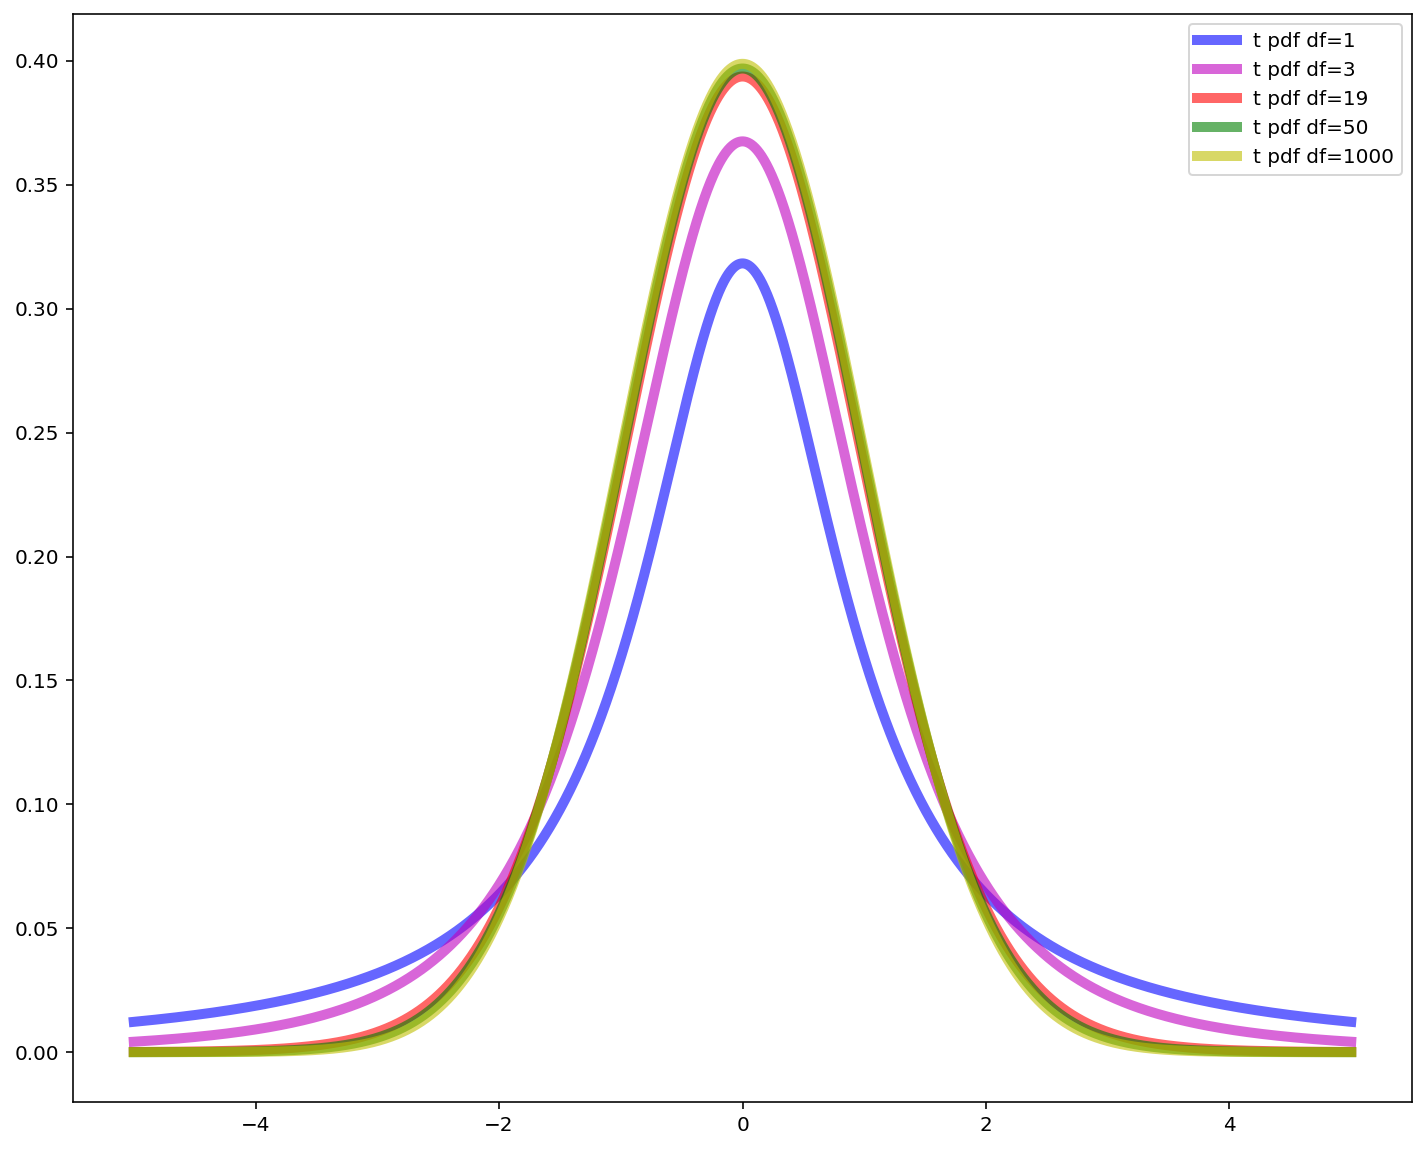

In [14]:
# T distribution graphs with increasing degrees of freedom

x_values = np.linspace(-5,5,5000)

fig, ax = plt.subplots(figsize=(12,10)) 

ax.plot(x_values, sp.t.pdf(x_values, 1),
       'b-', lw=5, alpha=0.6, label='t pdf df=1')

ax.plot(x_values, sp.t.pdf(x_values, 3),
       'm-', lw=5, alpha=0.6, label='t pdf df=3')

ax.plot(x_values, sp.t.pdf(x_values, 19),
       'r-', lw=5, alpha=0.6, label='t pdf df=19')

ax.plot(x_values, sp.t.pdf(x_values, 50),
       'g-', lw=5, alpha=0.6, label='t pdf df=50')

ax.plot(x_values, sp.t.pdf(x_values, 1000),
       'y-', lw=5, alpha=0.6, label='t pdf df=1000')

plt.legend()
plt.show()

In [15]:
# t PDF or t value at particular x
print(sp.t.pdf(-2.5394831906222888,19), sp.t.pdf(2.5394831906222888,19))
print(sp.t.pdf(0,19))
print(sp.t.pdf(0,3))
print(sp.t.pdf(0,1))

0.021185141747626764 0.021185141747626764
0.39372980729260343
0.36755259694786135
0.31830988618379075


In [16]:
#CDF at particular t values
print(sp.t.cdf(-2.5394831906222888,19), sp.t.cdf(2.5394831906222888,19))


0.010000000000035467 0.9899999999999645


In [17]:
# Inverse of t with df =19 at specific cdf values

print(sp.t.ppf(0.01, 19),
                sp.t.ppf(0.99, 19))
sp.t.ppf([0.01,0.99], 19)

-2.5394831906222888 2.539483190622288


array([-2.53948319,  2.53948319])

#### pvalue from t

In [18]:
print(sp.t.sf(abs(-1.3),19)) # one tailed, left tailed
print(sp.t.cdf(-1.3,19))

0.10457575014866397
0.10457575014866397


In [19]:
print(sp.t.sf(1.6,19)) # one tailed, right tailed
print(1-sp.t.cdf(1.6,19))

0.06304755459358014
0.06304755459358014


In [20]:
print(sp.t.sf(1.77,19)*2) # two tailed
print(1-(sp.t.cdf(1.77,19)-sp.t.cdf(-1.77,19)))

0.09277318782698615
0.09277318782698618


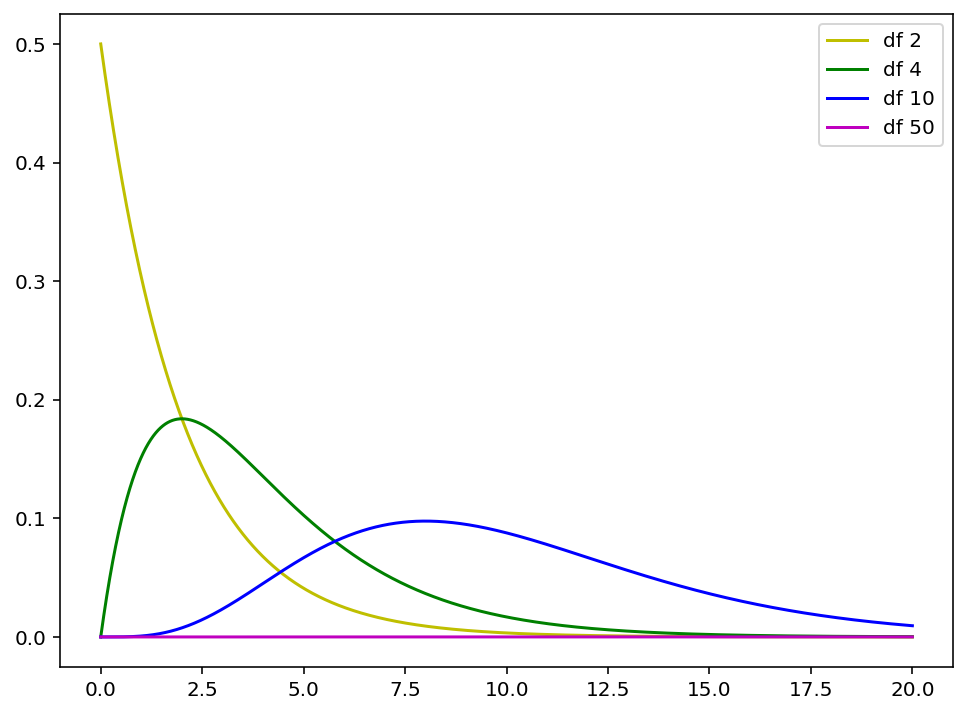

In [25]:
x_values = np.arange(0, 20, 0.001)

fig, ax = plt.subplots(figsize=(8,6)) 
ax.plot(x_values,  sp.chi2.pdf(x_values, df = 2), color = 'y', label = 'df 2')
ax.plot(x_values,  sp.chi2.pdf(x_values, df = 4), color = 'g', label = 'df 4')
ax.plot(x_values,  sp.chi2.pdf(x_values, df = 10), color = 'b', label = 'df 10')
ax.plot(x_values,  sp.chi2.pdf(x_values, df = 50), color = 'm', label = 'df 50')
plt.legend()
plt.show()

In [29]:
sp.chi2.cdf(5,df=2)

0.9179150013761012

In [37]:
#inverse of chisquare cdf
print(sp.chi2.ppf(0.91,df=2))

print(sp.chi2.ppf([0.05/2,1-0.05/2],df=2))

4.8158912173037445
[0.05063562 7.37775891]


In [38]:
# p value
sp.chi2.sf(0.91,df=2)

0.6344479679482282

In [45]:
print(sp.chi2.sf(1.3,df=2)) # one tailed, right tailed
print(1-sp.chi2.cdf(1.3,df=2))

0.5220457767610162
0.5220457767610162


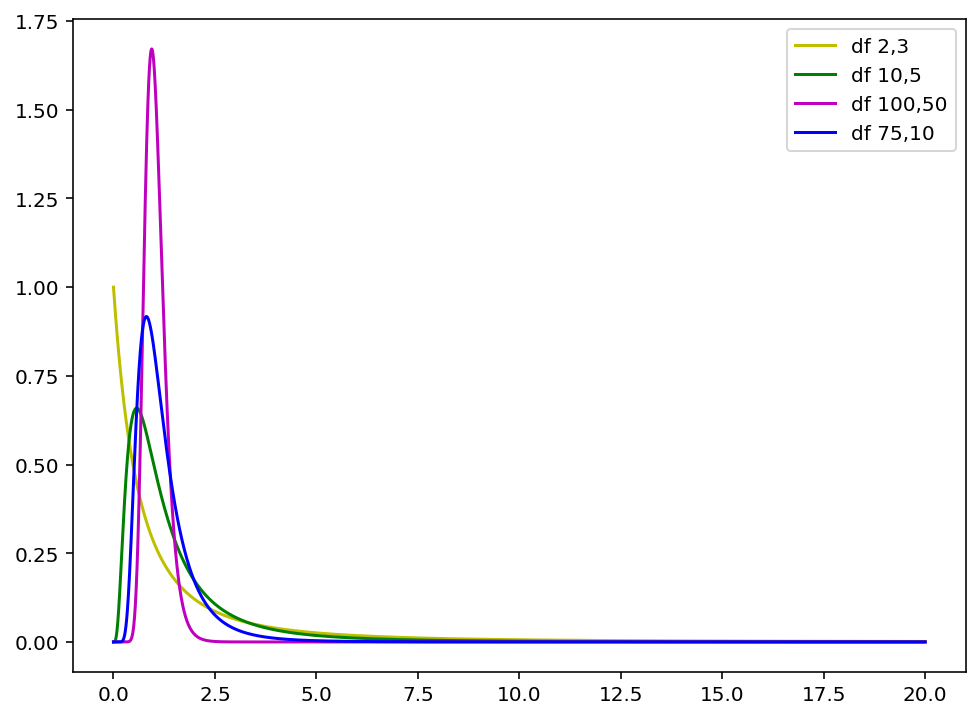

In [51]:
x_values = np.arange(0, 20, 0.001)

fig, ax = plt.subplots(figsize=(8,6)) 
ax.plot(x_values,  sp.f.pdf(x_values,2,3), color = 'y', label = 'df 2,3')
ax.plot(x_values,  sp.f.pdf(x_values,10,5), color = 'g', label = 'df 10,5')
ax.plot(x_values,  sp.f.pdf(x_values,100,50), color = 'm', label = 'df 100,50')
ax.plot(x_values,  sp.f.pdf(x_values,75,10), color = 'b', label = 'df 75,10')
plt.legend()
plt.show()


In [53]:
# p value from F ratio
print(sp.f.sf(1.3,10,3)) # one tailed, right tailed
print(1-sp.f.cdf(1.3,10,3))

0.4629738973131033
0.46297389731310323


In [55]:
# inverse of cdf
print(sp.f.ppf([0.05/2,1-0.05/2],10,3))

[ 0.20722719 14.41894204]


# HW4

<div class="alert alert-block alert-success">
<ul>
    Q1

In [56]:
obs = [20.8, 18.7, 19.9, 20.6, 21.9, 23.4, \
 22.8, 24.9, 22.2, 20.3, 24.9, 22.3,\
 27.0, 20.3, 22.2, 24.0, 21.1, 22.1, 22.0, 22.7]
obs

[20.8,
 18.7,
 19.9,
 20.6,
 21.9,
 23.4,
 22.8,
 24.9,
 22.2,
 20.3,
 24.9,
 22.3,
 27.0,
 20.3,
 22.2,
 24.0,
 21.1,
 22.1,
 22.0,
 22.7]

In [57]:
np.mean(obs)

22.205000000000002

In [58]:
len(obs)

20

In [59]:
l = []
for j in obs:
    l.append((j-np.mean(obs))**2)
print((sum(l)/(len(l))))
print(np.sqrt(sum(l)/(len(l))))
print(np.sqrt(sum(l)/(len(l)-1)))

3.6774749999999976
1.9176743727755234
1.9674923928161632


In [60]:
print(np.std(obs))
print(np.std(obs, ddof = 1))

1.9176743727755239
1.9674923928161636


In [61]:
np.var(obs, ddof = 1)

3.871026315789473

In [62]:
#94% confidence level, 6% significane level, df = 19
sp.t.ppf([0.06/2,1-0.06/2], 19)

array([-2.00001747,  2.00001747])

In [28]:
t_score = (22.205-20)/(1.967/np.sqrt(20))
t_score

5.013248490479952

In [29]:
#p value for t
print(sp.t.sf(t_score,19)) # right tailed

print((sp.t.sf(t_score,19))<0.06)

3.8591490381072755e-05
True


<div class="alert alert-block alert-success">
<ul>Q2

In [30]:
bodyfat_dataset = (pd.read_csv('BodyFatPercentage.csv')[['BODYFAT']])


In [31]:
print(bodyfat_dataset.shape)
bodyfat_dataset.head()

(252, 1)


,BODYFAT
0,12.6
1,6.9
2,24.6
3,10.9
4,27.8


In [32]:
bodyfat_dataset.describe()

,BODYFAT
count,252.000000
mean,18.938492
std,7.750856
min,0.000000
25%,12.800000
50%,19.000000
75%,24.600000
max,45.100000


In [33]:
bodyfat_dataset_list = list(bodyfat_dataset.iloc[:,0])

In [34]:
print(np.mean(bodyfat_dataset_list))
print(np.std(bodyfat_dataset_list, ddof=1))
print(len(bodyfat_dataset_list))

18.938492063492063
7.750855659481735
252


In [55]:
#85% confidence level, 15% significane level, df = 251
sp.t.ppf([0.15/2,1-0.15/2], 251)

array([-1.4439502,  1.4439502])

In [36]:
#85% confidence level, 15% significane level, assuming norm as n>30
sp.norm.ppf([0.15/2,1-0.15/2])

# comes similar for t or z

array([-1.43953147,  1.43953147])

In [37]:
print(18.938-(1.4439*(7.75/np.sqrt(252))))
print(18.938+(1.4439*(7.75/np.sqrt(252))))

18.233082084170054
19.642917915829944


<div class="alert alert-block alert-success">
<ul>
    Q3

In [38]:
dart_exp_dataset = pd.read_csv('DartsVersusExperts.csv')
dart_exp_dataset.head()

,Month,Year,Expert #1,Expert #2,Expert #3,Expert #4,Dart #1,Dart #2,Dart #3,Dart #4,DJIA,Average,Diff
0,Jul,1990,51.6,8.0,7.7,-16.7,53.8,-10.2,-8.6,-35.0,2.5,12.650,10.150
1,Aug,1990,56.7,37.8,27.8,-16.7,36.7,-3.7,-3.9,-22.0,11.5,26.400,14.900
2,Sep,1990,29.8,4.6,-9.4,-14.9,6.8,-9.8,-11.3,-42.9,-2.3,2.525,4.825
3,Oct,1990,-13.7,-18.2,-19.4,-28.6,44.4,-9.0,-20.3,-44.0,-9.2,-19.975,-10.775
4,Nov,1990,25.8,-39.8,-40.4,-96.9,12.9,-9.8,-31.4,-37.1,-8.5,-37.825,-29.325


In [39]:
dart_exp_dataset['Expert_avg']=(dart_exp_dataset['Expert #1']+dart_exp_dataset['Expert #2']+dart_exp_dataset['Expert #3']+dart_exp_dataset['Expert #4'])/4

In [40]:
dart_exp_dataset.head(10)

,Month,Year,Expert #1,Expert #2,Expert #3,Expert #4,Dart #1,Dart #2,Dart #3,Dart #4,DJIA,Average,Diff,Expert_avg
0,Jul,1990,51.6,8.0,7.7,-16.7,53.8,-10.2,-8.6,-35.0,2.5,12.650,10.150,12.650
1,Aug,1990,56.7,37.8,27.8,-16.7,36.7,-3.7,-3.9,-22.0,11.5,26.400,14.900,26.400
2,Sep,1990,29.8,4.6,-9.4,-14.9,6.8,-9.8,-11.3,-42.9,-2.3,2.525,4.825,2.525
3,Oct,1990,-13.7,-18.2,-19.4,-28.6,44.4,-9.0,-20.3,-44.0,-9.2,-19.975,-10.775,-19.975
4,Nov,1990,25.8,-39.8,-40.4,-96.9,12.9,-9.8,-31.4,-37.1,-8.5,-37.825,-29.325,-37.825
5,Dec,1990,2.8,-17.3,-48.7,-69.9,-2.9,-24.1,-29.4,-53.4,-12.8,-33.275,-20.475,-33.275
6,Jan,1991,8.9,0.6,-20.8,-29.3,-2.8,-23.0,-31.5,-32.7,-9.3,-10.150,-0.850,-10.150
7,Feb,1991,5.0,-7.0,-14.1,-65.2,-2.7,-11.3,-40.0,-95.2,-0.8,-20.325,-19.525,-20.325
8,Mar,1991,117.2,33.0,3.3,2.1,53.6,2.6,-1.6,-64.7,11.0,38.900,27.900,38.900
9,Apr,1991,74.2,47.7,4.9,-45.9,32.6,31.3,7.2,-26.3,15.8,20.225,4.425,20.225


In [41]:
dart_exp_dataset_diff_list=(dart_exp_dataset['Expert_avg']-dart_exp_dataset['DJIA'])
#dart_exp_dataset_diff_list

In [42]:
print(np.mean(dart_exp_dataset_diff_list))
print(np.std(dart_exp_dataset_diff_list))
print(np.std(dart_exp_dataset_diff_list, ddof =1))
print(len(dart_exp_dataset_diff_list))

4.408163265306125
20.671444442367555
20.74211625345379
147


In [65]:
#95% confidence level, 5% significane level, df = 146, right tailed
sp.t.ppf([0.05], 146)

array([-1.65535734])

In [44]:
#95% confidence level, 5% significane level, z 
sp.norm.ppf([0.05/2,1-0.05/2])

array([-1.95996398,  1.95996398])

In [66]:
t_score = np.mean(dart_exp_dataset_diff_list)/(np.std(dart_exp_dataset_diff_list,ddof=1)/np.sqrt(147))
print(t_score)

t_score>-1.655


2.576696541081393


True

In [46]:
#p value for t
print(sp.t.sf(t_score,146)) # right tailed

print((sp.t.sf(t_score,146))<0.05)

#Reject null hypothesis. i.e Experts outperform DJIA

0.005483325897599197
True


<div class="alert alert-block alert-success">
<ul>Q4

In [47]:
plano_dataset = pd.read_csv('PlanoVersusPlusLenses.csv')
plano_dataset.head()

,ID,Refraction,Plano,Plus,Comp_Plano,Comp_Plus,d
0,1,Myopia,208,248,65,70,5.0
1,2,Myopia,314,386,65,90,25.0
2,3,Myopia,177,169,75,70,-5.0
3,4,Myopia,236,244,85,75,-10.0
4,5,Myopia,178,220,70,75,5.0


In [48]:
plano_dataset_diff_list=(plano_dataset['Plano']-plano_dataset['Plus'])

In [49]:
print(np.mean(plano_dataset_diff_list))
print(np.std(plano_dataset_diff_list,ddof=1))
print(len(plano_dataset_diff_list))

-5.626865671641791
26.199604334796053
67


In [50]:
#99% confidence level, 1% significane level, df = 67-1
sp.t.ppf([0.01/2,1-0.01/2], 66)

array([-2.65239351,  2.65239351])

In [51]:
t_score = np.mean(plano_dataset_diff_list)/(np.std(plano_dataset_diff_list,ddof=1)/np.sqrt(67))
print(t_score)

t_score>2.65239


-1.7579609193241503


False

In [52]:
#p value for t
print(sp.t.sf(t_score,67)*2) # two tailed

print(((sp.t.sf(t_score,67))*2)<0.01)

#Fail to reject NULL hypothesis. so Plano or Plus doesn't make a difference in reading comprehension

1.9166786056403837
False


<div class="alert alert-block alert-success">
<ul>Q5

In [53]:
# For 95% confidence interval
# significance level of .05

print(norm_inv_cdf(0.05/2, 0, 1))
print(norm_inv_cdf(1-0.05/2, 0, 1))

-1.9599639845400545
1.959963984540054


In [54]:
print((15/34)+(1.959/34)*np.sqrt((15*19)/34))
print((15/34)-(1.959/34)*np.sqrt((15*19)/34))

0.6079927729540077
0.2743601682224629


In [49]:
x = list(range(0,100,2))
y = [k**2 for k in x]
print(x)
print(y)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]
[0, 4, 16, 36, 64, 100, 144, 196, 256, 324, 400, 484, 576, 676, 784, 900, 1024, 1156, 1296, 1444, 1600, 1764, 1936, 2116, 2304, 2500, 2704, 2916, 3136, 3364, 3600, 3844, 4096, 4356, 4624, 4900, 5184, 5476, 5776, 6084, 6400, 6724, 7056, 7396, 7744, 8100, 8464, 8836, 9216, 9604]


In [50]:
fit_coeffs = np.polyfit(x, y, 1)
fit_coeffs
a = fit_coeffs[0]
b = fit_coeffs[1]

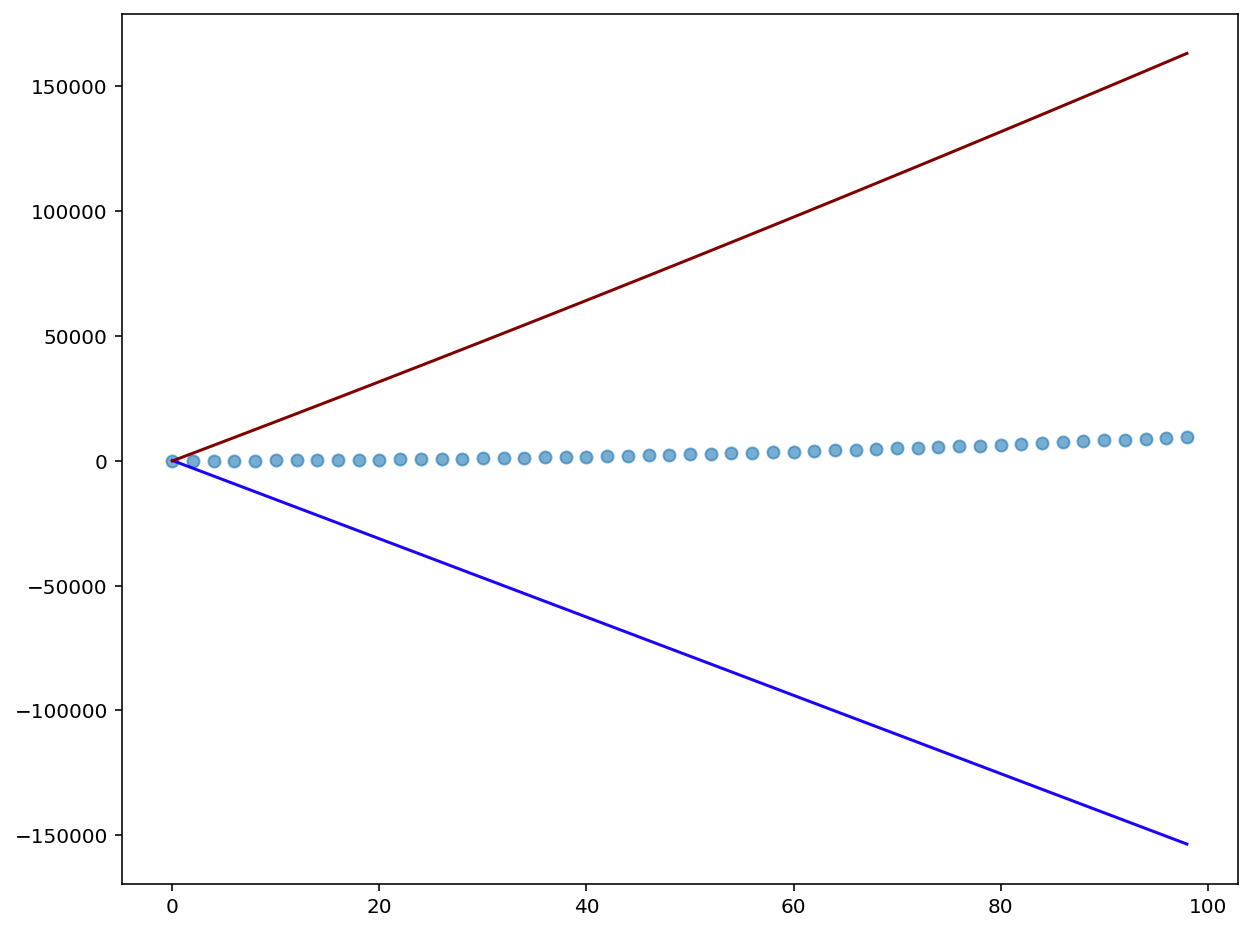

In [51]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x,y,alpha=0.6)

ax.plot(x,  [a + (b * k) for k in x], color="#1c03fc", lw=1.5) # Plotting the fitted linear regression line

ax.plot(x,  [y[i]-(a + (b * x[i])) for i in range(len(x))], color="maroon", lw=1.5) # Plotting residuals


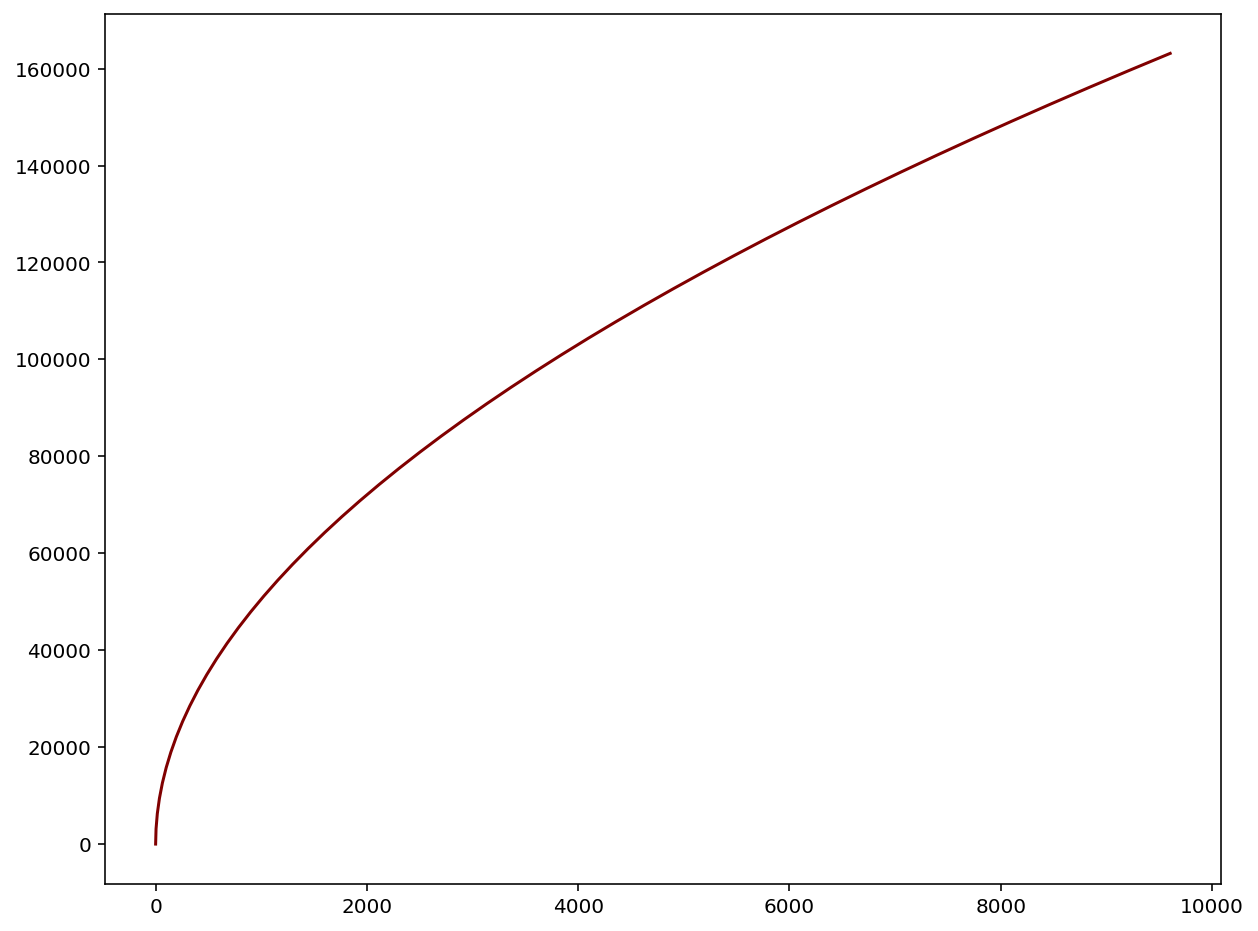

In [52]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(y,  [y[i]-(a + (b * x[i])) for i in range(len(x))], color="maroon", lw=1.5) # Plotting residuals